<a href="https://colab.research.google.com/github/lazybuttrying/Deep-Learning-Specialization/blob/main/C3/W3/sarcasm_with_bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
뉴스 기사의 헤드라인(영문장)을 통하여 sarcasm (비꼬는 기사) 인지 아닌지 여부를 판단하는 classification 문제입니다.

캐글 대회 링크 News Headlines Dataset For Sarcasm Detection : https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

# 🐱‍🏍 Import

In [1]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import urllib
# sarcasm.json
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

('sarcasm.json', <http.client.HTTPMessage at 0x7ffb5d359d50>)

# 📄 Prepare Dataset

In [2]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)
datastore[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [3]:
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Look Up data
print(len(training_sentences), len(testing_sentences))
print(len(training_labels), len(testing_labels))
print(training_sentences[0])
print(training_labels[0])

20000 6709
20000 6709
former versace store clerk sues over secret 'black code' for minority shoppers
0


# 🥏 Initialize Hyperparameters

In [4]:
vocab_size = 1000 # 빈도가 높은 1000개의 단어만 활용하겠다 -> 1000차원
embedding_dim = 16 # 1000차원을 16차원으로 : Data Sparasity 해결
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# ✂️ Tokenize

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
for key, val in word_index.items():
  print(key, val) # key=단어, value=인덱스
  break

<OOV> 1


In [6]:
print(type(word_index), len(word_index))
# 실제로는 25637개만 있지만 모델에는 1000 단어만 활용

<class 'dict'> 25637


# 🐍 Change to Sequence

In [7]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
print(training_sentences[0])

former versace store clerk sues over secret 'black code' for minority shoppers


# 🌫️ Padding: Match the lenght of all setence

In [8]:
# maxlen을 기준으로
# 길이가 짧은 문장은 0이나 특정 상수로 채워주거나
# 길이가 긴 문장은 앞/뒷부분을 잘라냄 
# trunc_type='post', padding_type='post'

training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
training_padded[0]

array([328,   1, 799,   1,   1,  47, 389,   1,   1,   6,   1,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0], dtype=int32)

# ⭐ Casting to numpy array

In [10]:
# list type is not valid for training. 
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [11]:
training_padded[0], training_labels[0]

(array([328,   1, 799,   1,   1,  47, 389,   1,   1,   6,   1,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0], dtype=int32), 0)

# 🕋 Define Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', # 0,1 이므로 binary_crossentropty
              optimizer='adam',
              metrics=['accuracy'])

# 🏃‍♂️ fit: training model

In [14]:
%ls

sample_data/  sarcasm.json


In [15]:
model_save_path = "./"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss',
                                                verbose=1)


In [16]:
num_epochs = 10

history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    callbacks = [checkpoint],
                    verbose=1,)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.7710
Epoch 00001: val_loss improved from inf to 0.38682, saving model to ./
625/625 [==============================] - 39s 57ms/step - loss: 0.4562 - accuracy: 0.7710 - val_loss: 0.3868 - val_accuracy: 0.8250
Epoch 2/10
625/625 [==============================] - ETA: 0s - loss: 0.3481 - accuracy: 0.8400
Epoch 00002: val_loss improved from 0.38682 to 0.37395, saving model to ./
625/625 [==============================] - 35s 56ms/step - loss: 0.3481 - accuracy: 0.8400 - val_loss: 0.3740 - val_accuracy: 0.8305
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.3231 - accuracy: 0.8539
Epoch 00003: val_loss improved from 0.37395 to 0.36703, saving model to ./
625/625 [==============================] - 36s 58ms/step - loss: 0.3231 - accuracy: 0.8539 - val_loss: 0.3670 - val_accuracy: 0.8356
Epoch 4/10
624/625 [============================>.] - ETA: 0s - loss: 0.3083 - accuracy: 0.8

# 💿 Get a best model

In [17]:
model.load_weights(model_save_path)
model.save("sarcasm_with_bi_LSTM.h5")

# https://teddylee777.github.io/tensorflow/news-sarcasm
# Dense Layer를 깊게 쌓아 보거나,
# Conv1D 혹은 LSTM을 두 겹으로 쌓는 식으로 모델을 개선해보자

#📈 Plot accuracy & loss

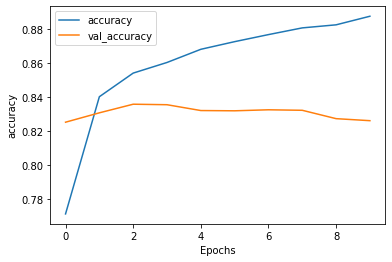

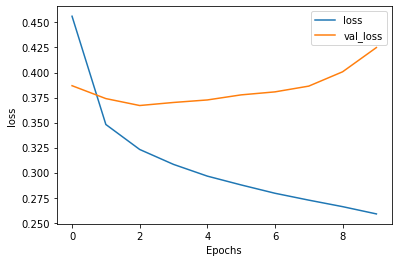

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# +) How to use "Glove" : Pre-trained word embedding
vocab_size를 가장 많이 사용된 단어 1000개로 한정하지 않고
word_index 속 전체 단어 길이로 할 수 있게 된다


embedding_dim 값이 100, 200, 300, 50 중 하나여야 한다

glove.6B.100d.txt

glove.6B.200d.txt

glove.6B.300d.txt

glove.6B.50d.txt

In [21]:
# glove.6B.100d.txt
!gdown --id 1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g

vocab_size = len(word_index)
embedding_dim = 100
embeddings_index = {};
with open('./glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

Downloading...
From: https://drive.google.com/uc?id=1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g
To: /content/glove.6B.100d.txt
100% 347M/347M [00:05<00:00, 63.3MB/s]


In [ ]:
model = tf.keras.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, 
                              weights=[embeddings_matrix], ######## 여기에 생성한 embeddings_matrix 추가
                              trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])